In [15]:
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from model import quad
from utils_general import *
from sphere import *

# hyper params initalization
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Hyper-param Config

In [2]:
_lr_rate = 0.0001
batch_size = 50
total_samples = 30e6
# total_samples = 1e4
# total_iterations = 2e3
r = 1.3
dim = 500
err_freq = 100
pgd_itr = 1
seed = 0

# Training begins

In [ ]:
seed_everything(seed)
_model = quad().to(_device)
# _model = make_perfect_model(_model, 1.3, _device)
_opt = optim.Adam(_model.parameters(), lr = _lr_rate)

# stats = train_clean(dim, r, total_samples, batch_size, err_freq, _model, _opt, _device)
stats = train_adv(pgd_itr, dim, r, total_samples, batch_size, err_freq, _model, _opt, _device)
# stats = train_true_max(dim, r, total_iterations, err_freq, _model, _opt, _device)

 65%|██████▌   | 392000/600000 [41:08<18:44, 184.93it/s, acc=100.00%, good_alpha=35.40%, loss=0.000271]

# Plot results

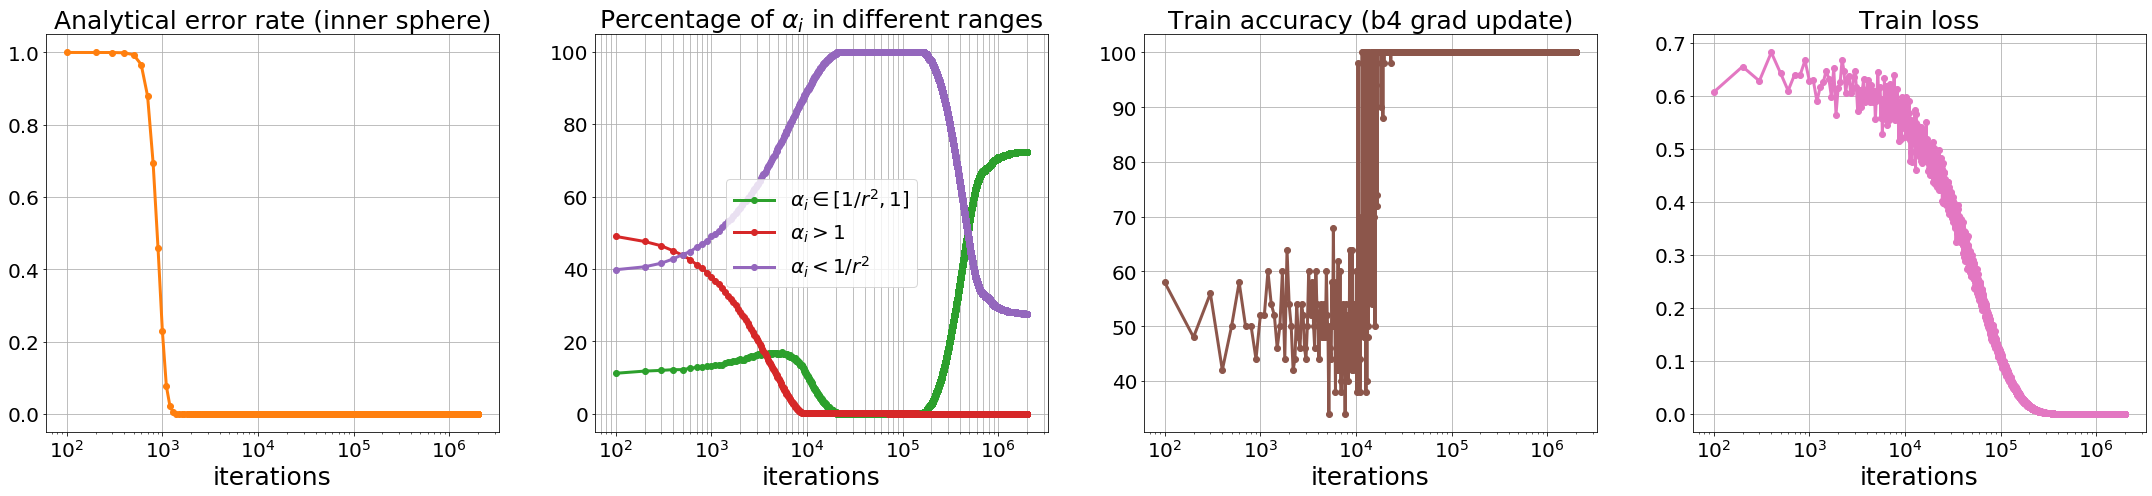

In [9]:
fig = plot_stats(stats, True)